# Analyze the spectra from the inner galaxy to measure the rotation curve
### use gausspy to fit multiple gaussians (https://gausspy.readthedocs.io/en/latest/index.html)
#### 1/11/22 jpw

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, glob
import math
import pickle
import gausspy.gp as gp
import plot_params
%matplotlib inline

### functions

In [2]:
def gaussian(amp, fwhm, mean):
    return lambda x: amp * np.exp(-4. * np.log(2) * (x-mean)**2 / fwhm**2)

def unravel(list):
    return np.array([i for array in list for i in array])

### parameters for gausspy

In [3]:
# set the same for all spectra here
g = gp.GaussianDecomposer()

# Setting AGD parameters
g.set('phase', 'two')
g.set('alpha1' , 1.25)
g.set('alpha2' , 2.5)
g.set('SNR_thresh', 3)
g.set('SNR2_thresh', 3)

### code

In [4]:
# go to directory with the reduced data
path = '../example_data/reduced_spectra/'
os.chdir(path)
cwd = os.getcwd()

In [5]:
# Galactocentric distance and rotation velocity
Rsun = 8.2   # kpc
Vsun = 220   # km/s

In [6]:
# create an ordered list of longitudes
lon = []
for f in os.listdir():
    if f[0:3]=='lon' and f[-3:]=='csv':
        l = int(f[3:5])
        lon.append(l)
lon.sort()

using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]


SUCCESS
100 finished.%
------------------------
lon = 10     R =  1.4
------------------------
  Amp     FWHM     Mean
   6.8    117.2    419.3
  25.5     58.6    395.2
   2.8    320.0    435.0
------------------------
Vm =  16.3  Vmax =  40.0  Vrot =  78.2
using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]


SUCCESS
100 finished.%
------------------------
lon = 20     R =  2.8
------------------------
  Amp     FWHM     Mean
   6.5    112.0    415.2
   7.6    232.2    441.8
  23.2     46.5    403.2
------------------------
Vm =  14.2  Vmax =  42.2  Vrot = 117.4
using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]


SUCCESS
100 finished.%
------------------------
lon = 30     R =  4.1
------------------------
  Amp     FWHM     Mean
  13.0    160.2    458.0
  24.1    -44.8    405.5
   4.1     64.5    302.6
------------------------
Vm =  36.2  Vmax =  74.1  Vrot = 184.1
using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]


SUCCESS
100 finished.%
------------------------
lon = 40     R =  5.3
------------------------
  Amp     FWHM     Mean
  11.6    161.8    440.9
  16.2     23.9    400.9
  11.1    -38.0    427.8
------------------------
Vm =  26.9  Vmax =  53.1  Vrot = 194.5
using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]


SUCCESS
100 finished.%
------------------------
lon = 50     R =  6.3
------------------------
  Amp     FWHM     Mean
   7.1    126.6    427.0
  17.5     44.5    418.4
   3.3     74.3    268.1
------------------------
Vm =  19.6  Vmax =  35.6  Vrot = 204.2
using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]


SUCCESS
100 finished.%
------------------------
lon = 60     R =  7.1
------------------------
  Amp     FWHM     Mean
  12.4     25.8    415.2
  15.4     68.6    407.3
   3.2    114.6    274.9
------------------------
Vm =  14.1  Vmax =  24.9  Vrot = 215.4
using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]


SUCCESS
100 finished.%
------------------------
lon = 70     R =  7.7
------------------------
  Amp     FWHM     Mean
  15.5     26.9    410.8
  12.3     61.1    396.1
   4.2    157.6    305.5
------------------------
Vm =  11.3  Vmax =  18.7  Vrot = 225.5
using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]


SUCCESS
100 finished.%
------------------------
lon = 80     R =  8.1
------------------------
  Amp     FWHM     Mean
  18.4     40.3    402.7
   7.7    163.2    331.4
------------------------
Vm =   7.4  Vmax =  21.0  Vrot = 237.7
using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]


SUCCESS
100 finished.%
------------------------
lon = 90     R =  8.2
------------------------
  Amp     FWHM     Mean
  21.6     42.2    395.9
  12.5    117.7    316.5
------------------------
Vm =   3.8  Vmax =  14.0  Vrot = 234.0


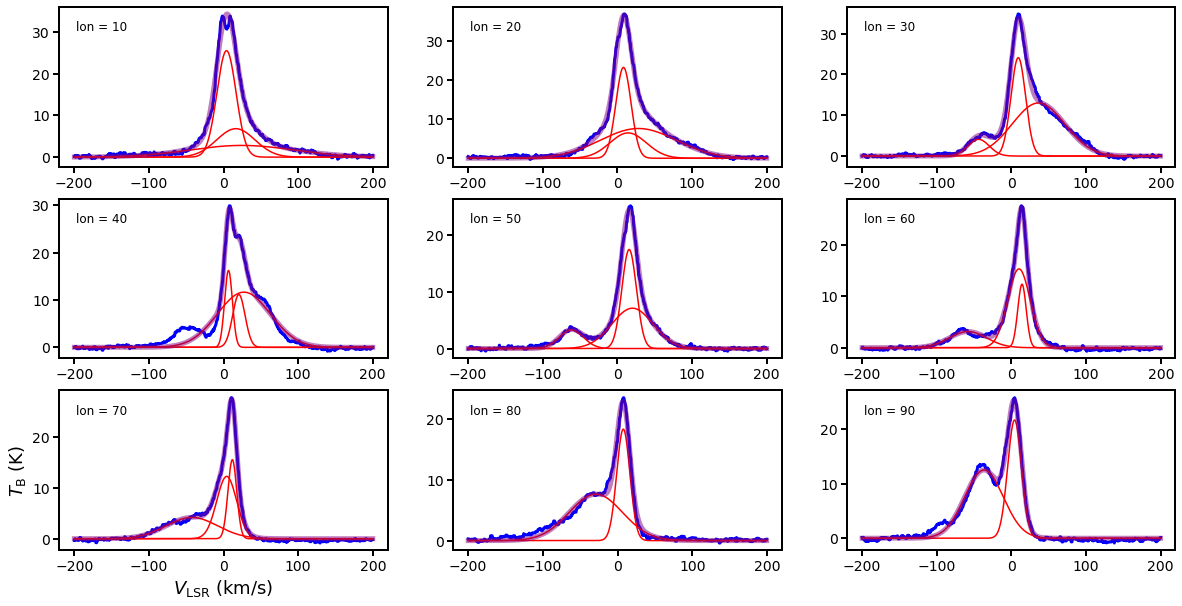

In [10]:
n = len(lon)
nx = 3
ny = math.ceil(n/nx)
sx = 20
sy = 0.5 * sx * ny / nx
fig = plt.figure(figsize=(sx,sy))

# plot a single position for the title page of the instruction guide
#lon = [30]
#n = nx = ny = 1
#fig = plt.figure(figsize=(12,3))

R1 = np.zeros(n)
vmax1 = np.zeros(n)
vrot1 = np.zeros(n)
for i,l in enumerate(lon):
    ax = fig.add_subplot(ny, nx, i+1)
    #fig = plt.figure(figsize=(10,7))
    #ax = fig.add_subplot(111)
    v, T = np.genfromtxt('lon'+str(l)+'_reduced.csv', delimiter=',', unpack=True)
    
    crop = (v > -200) & (v < 200)
    v = v[crop]
    T = T[crop]
    ax.plot(v, T, color='blue', lw=3, zorder=0)
    ax.text(0.05, 0.85, str('lon = {0}'.format(l)), fontsize=12, transform=ax.transAxes)
    if i==6:
        ax.set_xlabel(r'$V_{\rm LSR}$ (km/s)')
        ax.set_ylabel(r'$T_{\rm B}$ (K)')
    
    # write it out in the format that gausspy wants to process
    pfile = 'lon'+str(l)+'.pickle'
    nchan = T.size
    rms = 1
    data = {}
    chan = np.arange(nchan)
    errors = np.ones(nchan) * rms
    
    data['data_list'] = data.get('data_list', []) + [T]
    data['x_values'] = data.get('x_values', []) + [chan]
    data['errors'] = data.get('errors', []) + [errors]
    pickle.dump(data, open(pfile, 'wb'))
    
    # run GaussPy
    # (note that it works on a pickle file which is why we have to write one out and then read it back in...)
    data_decomp = g.batch_decomposition(pfile)
    means_fit = unravel(data_decomp['means_fit'])
    amps_fit = unravel(data_decomp['amplitudes_fit'])
    fwhms_fit = unravel(data_decomp['fwhms_fit'])
    
    # plot the gaussian decomposition components
    model = np.zeros(len(chan))
    mu_max = -9999
    print('------------------------')
    print('lon = {0}     R = {1:4.1f}'.format(l, Rsun * np.sin(l * np.pi / 180)))
    print('------------------------')
    print('  Amp     FWHM     Mean')
    for j in range(len(means_fit)):
        A = amps_fit[j]
        fwhm = fwhms_fit[j]
        mu = means_fit[j]
        print('{0:6.1f}   {1:6.1f}   {2:6.1f}'.format(A,fwhm,mu))
        component = gaussian(A, fwhm, mu)(chan)
        model += component
        ax.plot(v, component, color='red', lw=1.5)  
        if (A > 0) & (fwhm < 200) & (mu > mu_max):
            mu_max = mu
    ax.plot(v, model, color='purple', lw=5, alpha=0.5, zorder=99)
    print('------------------------')
        
    R1[i] = Rsun * np.sin(l * np.pi / 180)
    kmax = int(mu_max)
    vm = v[kmax]
    
    # Shane & Bieger-Smith 1966 correction
    dv = v[1] - v[0]
    vmax1[i] = vm + dv*np.sum(T[kmax:])/T[kmax] - dv/2
    vrot1[i] = (vmax1[i]/np.sin(l*np.pi/180) + Vsun)*R1[i]/Rsun
    print('Vm ={0:6.1f}  Vmax ={1:6.1f}  Vrot ={2:6.1f}'.format(vm, vmax1[i], vrot1[i]))
    

Text(0, 0.5, 'Vr (km/s)')

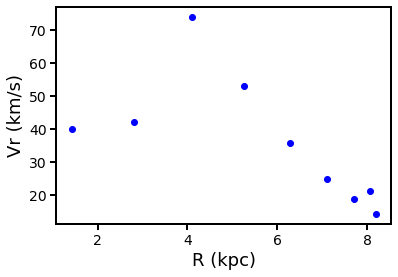

In [8]:
# radial velocity vs radius
plt.plot(R1, vmax1, 'bo')
plt.xlabel('R (kpc)')
plt.ylabel('Vr (km/s)')

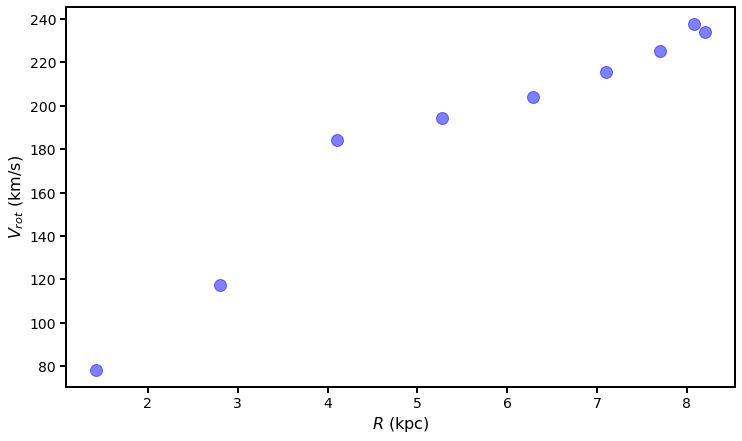

In [9]:
# rotation curve
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.plot(R1, vrot1, 'bo', ms=12, alpha=0.5, label='l < 90')
#ax.legend(fontsize=12)
ax.set_xlabel(r'$R$ (kpc)', fontsize=16)
ax.set_ylabel(r'$V_{rot}$ (km/s)', fontsize=16)
plt.savefig('rotation_curve.png')

In [10]:
from astropy import constants as c
from astropy import units as u
R = 8200 *  u.pc
V = 220 * u.km / u.s
M = R * V**2 / c.G
M_solar_masses = (M/u.Msun).decompose()
print('Dynamical mass = {0:5.1e} Msun'.format(M_solar_masses))

Dynamical mass = 9.2e+10 Msun
